In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("iris(7).csv")   # Ensure your file is in the same directory
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (150, 5)
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [4]:
df.columns = df.columns.str.strip().str.lower()

In [5]:
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])

In [6]:
X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [8]:
results = []


In [9]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec
    })

    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred, zero_division=0))


Model: Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Model: Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
   

In [10]:
results_df = pd.DataFrame(results)
print("\nComparison of Classification Algorithms:\n")
print(results_df)



Comparison of Classification Algorithms:

                 Model  Accuracy  Precision  Recall
0  Logistic Regression       1.0        1.0     1.0
1        Decision Tree       1.0        1.0     1.0
2        Random Forest       1.0        1.0     1.0
3                  SVM       1.0        1.0     1.0
4                  KNN       1.0        1.0     1.0


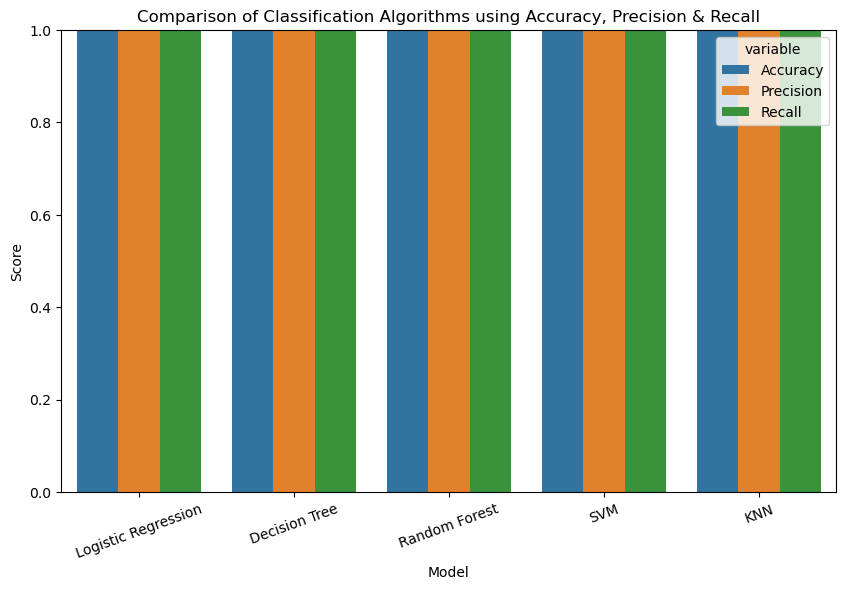

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Comparison of Classification Algorithms using Accuracy, Precision & Recall")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()